**Temas**  
* Manipulaciones en pandas y numpy, imputación de datos y preprocesamientos
* Feature Engineering
* Regresión
* Clasificación
* Regularización
* SVM


**Formalidades**  
* Equipos de trabajo de 3 personas (*Los estudiantes deben estar preparados para presentar la tarea el día de la entrega*)
* El entregable debe ser un _Jupyter Notebook_ incluyendo los códigos utilizados, los resultados, los gráficos realizados y comentarios. Debe seguir una estructura similar a un informe (se debe introducir los problemas a trabajar, presentar los resultados y discutirlos), se penalizará fuertemente ausencia de comentarios, explicaciones de gráficos, _etc_. Las preguntas que deben responder se encuentran especificadas explícitamente con letras, ejemplo a) b) c), por lo tanto cualquier pregunta que se encuentre incompleta será penalizada con descuento del puntaje. Recuerde que los códigos presentes en este documento son solo una guía de referencia, por lo tanto no necesariamente funcionan, usted debe mostrar todos sus conocimientos aprendidos a lo largo de la carrera para que su código funcione como se espera. Si lo prefiere puede entregar un _Jupyter Notebook_ por pregunta o uno por toda la tarea, con tal de que todos los entregables esten bien identificados y se encuentren en el mismo repositorio de _Github_.
* Se debe preparar una presentación del trabajo realizado y sus hallazgos. El presentador será elegido aleatoriamente y deberá apoyarse en el _Jupyter Notebook_ que entregarán. 
* Formato de entrega: envı́o de link del repositorio en _Github_, al correo electrónico de los ayudantes (<sebastian.sanchezl@sansano.usm.cl>), en copia al profesor (<cvalle@inf.utfsm.cl>). Especificar el siguiente asunto: [INF-398-2023-1 Tarea 1]. Invitar como colaborador a los usuarios de github "ssanchezl" para poder acceder al repositorio en caso de ser privado.

* Fecha de presentaciones 12 de Mayo, en horario de clases.
* Fecha de entrega: 13 de Mayo. Hora límite de entrega: 12:00 p.m. Cualquier _commit_ luego de la hora límite no será evaluado. Se realizará descuento por atrasos en envío del mail igualmente.  

<hr style="height:2px;border:none"/>

<center>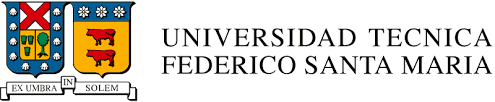</center>



<hr style="height:2px;border:none"/>
<h1 align='center'> INF-398 INTRODUCCIÓN AL APRENDIZAJE AUTOMÁTICO - 2023-1 </h1>

<H3 align='center'> Tarea 1  </H3>
<hr style="height:2px;border:none"/>

Importe las librerías necesarias para cargar explorar el conjunto de datos.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.metrics import mean_squared_error, classification_report, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.feature_selection import mutual_info_classif

# 1. Regresión lineal para la predicción de la demanda de bicicletas compartidas en Seúl

La regresión lineal es un modelo matemático que pertenece al aprendizaje supervisado, el cual intenta aplicar relaciones que predigan el resultado de un evento basándose en los datos de variables independientes. Llamaremos a este resultado: variable objetivo o _target_, y como es un modelo de regresión lineal la variable objetivo es una variable continua.

<center><img src=https://t4.ftcdn.net/jpg/02/32/47/13/360_F_232471334_vfDHKHeRHtwkn0zvd8SM98THwQeYDn8y.jpg></center>

Los sistemas de bicicletas compartidas son un medio para alquilar bicicletas en el que el proceso de afiliación, alquiler y devolución se automatiza a través de una red de _quioscos o puntos de estacionamiento_ repartidos por toda la ciudad. Gracias a estos sistemas, los usuarios pueden alquilar una bicicleta en un lugar y devolverla en otro cuando lo necesiten.

En esta pregunta se le proporcionan datos de alquiler de la cantidad de bicicletas arrendadas por hora durante dos años según variables climáticas y laborales. 

Usted tiene separar el dataset en un conjunto de entrenamiento y en un conjunto de prueba, y el objetivo de esta pregunta será: **predecir el número total de bicicletas alquiladas en el conjunto de pruebas**.

La base de datos y toda la información asociada a esta se puede encontrar en el siguiente link: https://www.kaggle.com/datasets/saurabhshahane/seoul-bike-sharing-demand-prediction.

## 1.1 Manipulación y exploración del conjunto de datos

Lo primero es obtener los datos, para esto se pueden descargar los archivos directamente de la página de Kaggle a través del link de la descripción de arriba.

Existen distintas formas para obtener los datos, de las cuales usted debe elegir solo uno:

1. Puede descargarlos y guardarlos en su directorio local y luego cargar los datos usando este notebook con Jupyter.

2. Puede utilizar google colab. En este caso existen 2 formas de cargar los datos, montando su cuenta de google drive en el colab y guardar los datos en una carpeta de drive. La otra forma es cargar los datos de forma en la máquiva virtual que le asigna colab de manera **temporal**. Tenga cuidado si elige la forma temporal ya que si por alguna razón se desconecta del ambiente, deberá volver a descargar los datos.

3. Existen muchas otras formas más pero usted puede obtener los datos con cualquier método que estime conveniente.


También es posible descargarlos mediante la [API](https://github.com/Kaggle/kaggle-api#kaggle-api) de Kaggle siguiendo las instrucciones en la sección API credentials. Si desea utilizar google colab puede seguir este tutorial [Kaggle + Colab](https://galhever.medium.com/how-to-import-data-from-kaggle-to-google-colab-8160caa11e2)

### 1.1.1 Exploración del conjunto de datos




In [3]:
data = pd.read_csv('SeoulBikeData.csv',encoding= 'unicode_escape')

In [4]:
data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


Explore el conjunto de datos y responda  brevemente las siguiente preguntas:

> a) ¿Cuáles variables poseen valores numéricos y cuáles poseen valores categóricos?

> b) ¿Qué aspecto tienen en común las variables _Date_ y _Season_?

> c) Revise si faltan valores en los conjuntos de datos de prueba y de entrenamiento.

In [5]:
def datainfo():
    temp_ps = pd.DataFrame(index=data.columns)
    temp_ps['DataType'] = data.dtypes
    temp_ps["Non-null_Values"] = data.count()
    temp_ps['Unique_Values'] = data.nunique()
    temp_ps['NaN_Values'] = data.isnull().sum()
    temp_ps['NaN_Values_Percentage'] = (temp_ps['NaN_Values']/len(data))*100 
    return temp_ps

info = datainfo()
info

,DataType,Non-null_Values,Unique_Values,NaN_Values,NaN_Values_Percentage
Date,object,8760,365,0,0.0
Rented Bike Count,int64,8760,2166,0,0.0
Hour,int64,8760,24,0,0.0
Temperature(°C),float64,8760,546,0,0.0
Humidity(%),int64,8760,90,0,0.0
Wind speed (m/s),float64,8760,65,0,0.0
Visibility (10m),int64,8760,1789,0,0.0
Dew point temperature(°C),float64,8760,556,0,0.0
Solar Radiation (MJ/m2),float64,8760,345,0,0.0
Rainfall(mm),float64,8760,61,0,0.0


In [6]:
# Seleccionar variables numéricas
numericas = list(info[info['DataType'] == 'int64'].index) + list(info[info['DataType'] == 'float64'].index)
print('a) Variables numéricas:')
for i,variable in enumerate(numericas):
    print(f'   {i+1}. {variable}')
print('\n')

# Seleccionar variables categóricas
categoricas = list(info[info['DataType'] == 'object'].index)
print('   Variables categóricas:')
for i,variable in enumerate(categoricas):
    print(f'   {i+1}. {variable}')

a) Variables numéricas:
   1. Rented Bike Count
   2. Hour
   3. Humidity(%)
   4. Visibility (10m)
   5. Temperature(°C)
   6. Wind speed (m/s)
   7. Dew point temperature(°C)
   8. Solar Radiation (MJ/m2)
   9. Rainfall(mm)
   10. Snowfall (cm)


   Variables categóricas:
   1. Date
   2. Seasons
   3. Holiday
   4. Functioning Day


b) `Respuesta`: Entre las variables _Date_ y _Season_ existe una relación de dependencia directa dado que las estaciones dependen del día y mes en el que nos encontremos. Se puede recuperar la variable _Season_ a través de la variable _Date_, pero no viceversa. Cabe destacar que _Season_ se puede interpretar como una clasificación de _Date_ por períodos.

c) `Respuesta`: No faltarán valores en los conjuntos de datos de prueba y entrenamiento ya que el conjunto completo no posee valores NaN en ninguna de sus variables.

> d) ¿Por qué la variable _Functioning Day_ no aporta ningún valor al entrenamiento? Grafique, justifique y elimine la columna.

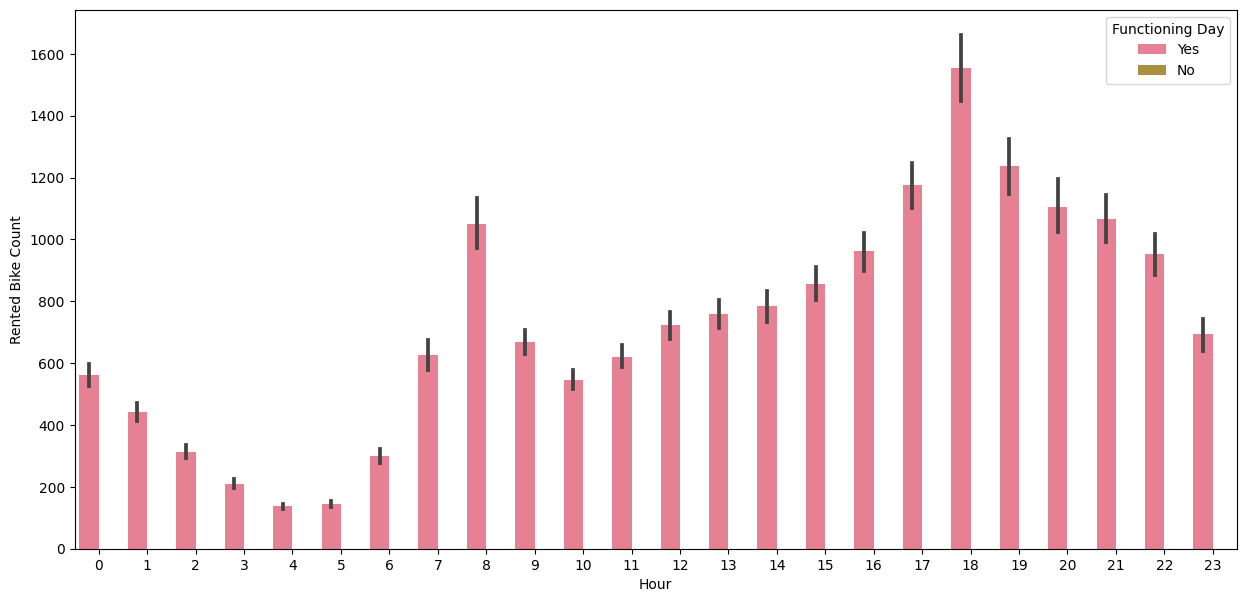

In [7]:
def barplots(x,y,hue):
    plt.figure(figsize=(15,7))
    sns.set_palette("husl")
    sns.barplot(x=x,y=y,hue=hue,data=data);

barplots('Hour','Rented Bike Count','Functioning Day')

In [8]:
conteo = data['Functioning Day'].value_counts()
print(f'Functioning Day:')
print(f'{conteo}\n')

print("Rented Bike Count if Functioning Day == 'No':")
print(data[data['Functioning Day'] == 'No']['Rented Bike Count'].value_counts())

Functioning Day:
Yes    8465
No      295
Name: Functioning Day, dtype: int64

Rented Bike Count if Functioning Day == 'No':
0    295
Name: Rented Bike Count, dtype: int64


Revisamos si los días son completamente operativos o no operativos (si es que hay o no días mixtos; solo con algunas horas operativas)
Revisamos si los días son completamente de vacaciones o no
Revisamos si los días son completamente de cierta estación o no

In [9]:
dates = data['Date'].unique()

for verify in ['Functioning Day', 'Holiday', 'Seasons']:
    print(f'Verificamos completitud de "{verify}"')
    dias_completos = 0
    mixtos = []
    for date in dates:
        count = data[data['Date'] == date][verify].value_counts()
        if len(count) == 1:
            dias_completos += 1
        else:
            mixtos.append(date)
    print(f'días completos: {dias_completos}')
    print(f'días mixtos: {len(dates) - dias_completos}')
    for date in mixtos:
        print(f'- {date}')
    print('---------------------------------------------------')

Verificamos completitud de "Functioning Day"
días completos: 364
días mixtos: 1
- 06/10/2018
---------------------------------------------------
Verificamos completitud de "Holiday"
días completos: 365
días mixtos: 0
---------------------------------------------------
Verificamos completitud de "Seasons"
días completos: 365
días mixtos: 0
---------------------------------------------------


# VER SI ELIMINAR OBSERVACIONES

d) `Respuesta`: En las horas no operativas (_Functioning Day_ = 'No') se tiene que no existe renta de bicicletas, por lo que no tiene sentido analizarlas, ya que _Functioning Day_ pasa a ser una variable determinista. Luego, solo nos interesan las horas operativas (_Functioning Day_ = 'Yes') para seguir el análisis. Por ende, eliminaremos estas observaciones (_Functioning Day_ = 'No') y la columna _Functioning Day_.

In [10]:
data_fixed = data.drop(list(data[data['Functioning Day'] == 'No'].index), axis=0, inplace=False)
data_fixed.reset_index(drop=True, inplace=True)
data_fixed.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8460,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8461,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8462,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8463,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8464,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [11]:
data.drop('Functioning Day', axis=1, inplace=True)
data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday


### 1.1.2 Exploración de Features

> a) Revise detalladamente las variables: 'Date', 'Holiday', 'Seasons' y 'Rented Bike Count' del conjunto de datos cuente y grafique su histograma.

Una vez analizado lo anterior responda las siguientes preguntas:

> b) ¿La gente arrienda más bicicletas en vacaciones o en días de trabajo?

> c) ¿Se arriendan más bicicletas los fines de semana o durante la semana?

> d) ¿De qué forma afecta el clima al arriendo de bicicletas?

Para las preguntas b), c) y d) apóyese de los gráficos.


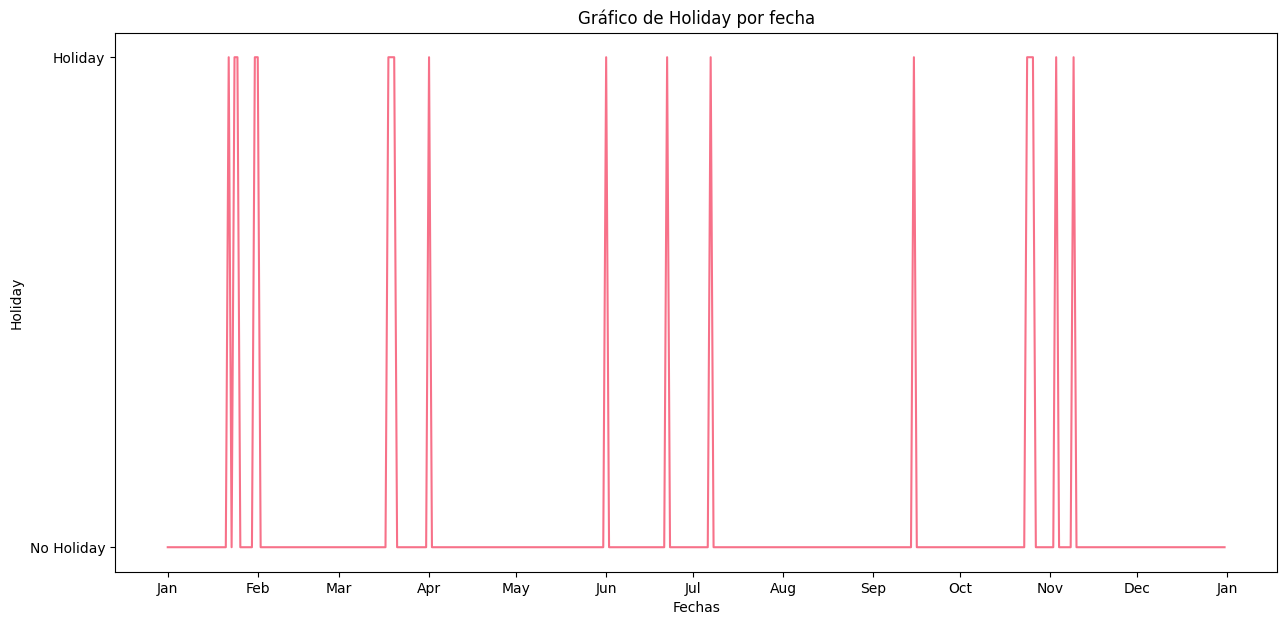

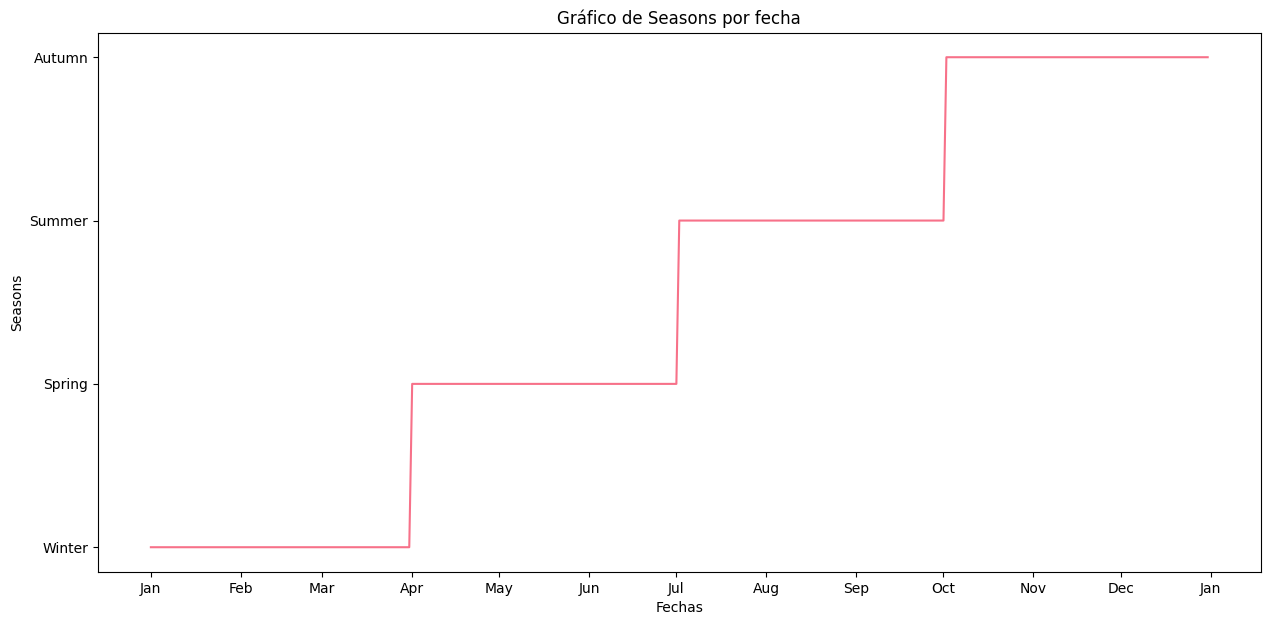

In [12]:
import matplotlib.pyplot as plt
from matplotlib import dates as mdates
from matplotlib import dates as md

dates = data['Date'].unique()
for verify in ['Holiday', 'Seasons']:
    verify_diario =[]
    for date in dates:
        verify_diario.append(list(data[data['Date'] == date][verify])[0])
        
    fig, ax=plt.subplots(1, 1, figsize=(15, 7))  
    ax.xaxis.set_major_locator(md.MonthLocator())
    ax.xaxis.set_major_formatter(md.DateFormatter('%b'))

    plt.plot(dates, verify_diario)
    plt.xlabel('Fechas')
    plt.ylabel(verify)
    plt.title(f'Gráfico de {verify} por fecha')
    plt.show()

Podríamos concluir que dada la distribución de _Holiday_ == 'Yes', se hace referencia a los días feriados que son aislados. Además, notamos que la variable _Season_ particiona 'continuamente' las fechas.

Revisemos que las observaciones están efectivamente registradas por hora.

In [16]:
dates = data['Date'].unique()

dias_completos = 0
incompletos = []
for date in dates:
    count = data[data['Date'] == date]['Hour'].value_counts()
    if len(count) == 24:
        dias_completos += 1
    else:
        incompletos.append(date)
print(f'días de 24 horas: {dias_completos}')
print(f'días incompletos: {len(dates) - dias_completos}')
for date in incompletos:
    print(f'- {date}')

días de 24 horas: 365
días incompletos: 0


Creamos un dataframe con solo 1 observación por fecha y con la columna _Rented Bike Count_ como la suma de todos los arriendos por hora en el día. 

In [32]:
from datetime import datetime
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')
mini_data_diario = data.loc[:, ['Date','Rented Bike Count']].groupby(pd.Grouper(key='Date', freq='D')).sum()
mini_data_diario = mini_data_diario.reset_index()
mini_data_diario.head()

,Date,Rented Bike Count
0,2017-12-01,9539
1,2017-12-02,8523
2,2017-12-03,7222
3,2017-12-04,8729
4,2017-12-05,8307


In [35]:
# Agregar una columna que indica si la fecha corresponde a un día de la semana o un fin de semana
data['Weekday'] = data['Date'].dt.weekday.apply(lambda x: 'Yes' if x < 5 else 'No')
mini_data_diario['Weekday'] = mini_data_diario['Date'].dt.weekday.apply(lambda x: 'Yes' if x < 5 else 'No')

holiday = []
season = []
for date in mini_data_diario['Date']:
    holiday.append(list(data[data['Date'] == date]['Holiday'])[0])
    season.append(list(data[data['Date'] == date]['Seasons'])[0])

mini_data_diario['Holiday'] = holiday
mini_data_diario['Seasons'] = season

mini_data_diario.head()

,Date,Rented Bike Count,Weekday,Holiday,Seasons
0,2017-12-01,9539,Yes,No Holiday,Winter
1,2017-12-02,8523,No,No Holiday,Winter
2,2017-12-03,7222,No,No Holiday,Winter
3,2017-12-04,8729,Yes,No Holiday,Winter
4,2017-12-05,8307,Yes,No Holiday,Winter


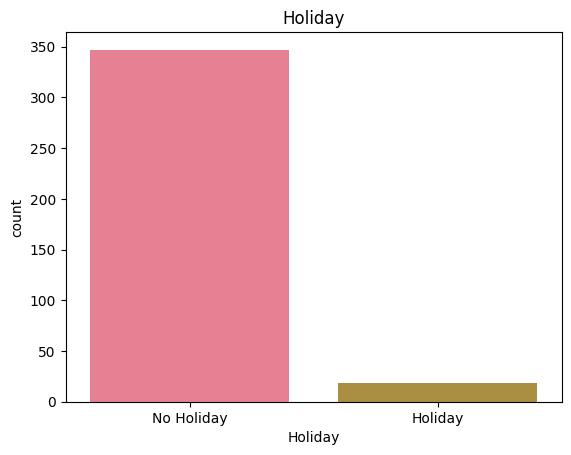

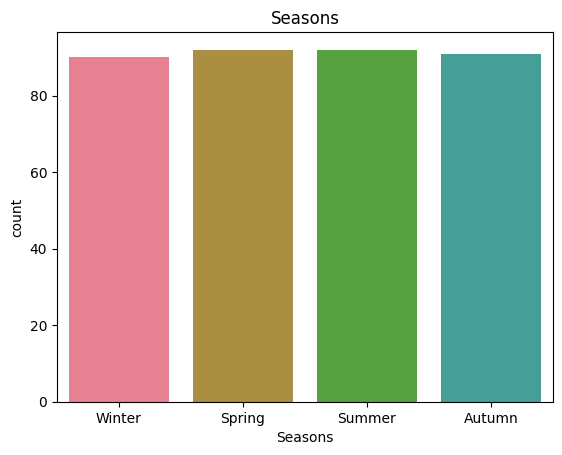

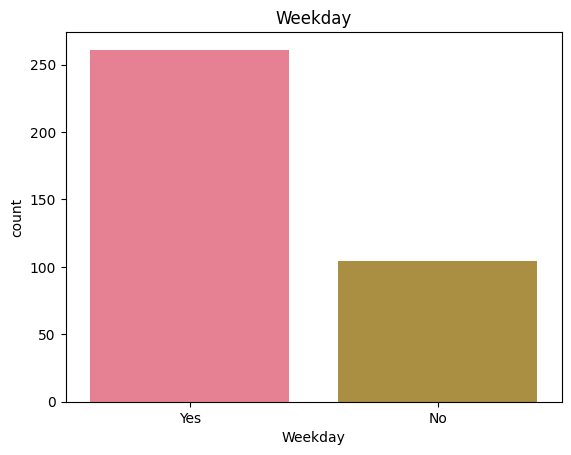

In [110]:
cat_features = data[['Holiday', 'Seasons','Weekday']]
for i in cat_features:
    sns.countplot(x = i, data = mini_data_diario)
    plt.title(i)
    plt.show()

In [112]:
columns = ['Nombres','mean', 'std', 'max', 'min']
categories = []
list_stats = []
for verify in ['Holiday', 'Seasons','Weekday']:
    for cat in mini_data_diario[verify].unique():
        categories.append(cat)
        stats_cat = mini_data_diario[mini_data_diario[verify] == cat]['Rented Bike Count'].describe()
        stats = [round(x) for x in stats_cat[['mean', 'std', 'max', 'min']].values]
        list_stats.append(stats)

DATA2= pd.DataFrame(categories)
DATA3= pd.DataFrame(list_stats)
data_stats = pd.concat([DATA2,DATA3], axis=1)
data_stats.columns = columns
data_stats

,Nombres,mean,std,max,min
0,No Holiday,17165,10191,36149,0
1,Holiday,11994,10621,30498,0
2,Winter,5413,1808,9539,2014
3,Spring,17521,8672,31681,0
4,Summer,24818,7297,36149,3231
5,Autumn,19670,9398,31809,0
6,Yes,17267,10359,36149,0
7,No,16016,9995,34360,0


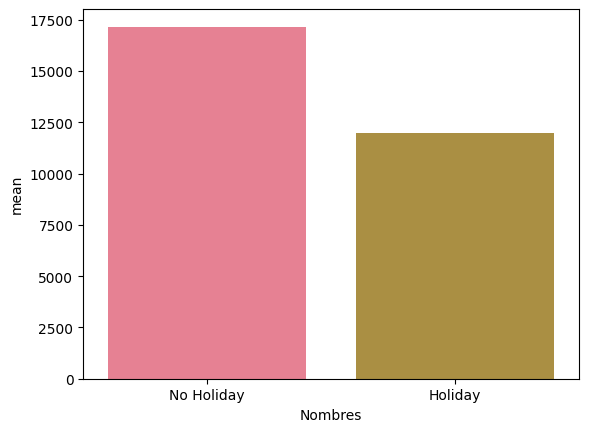

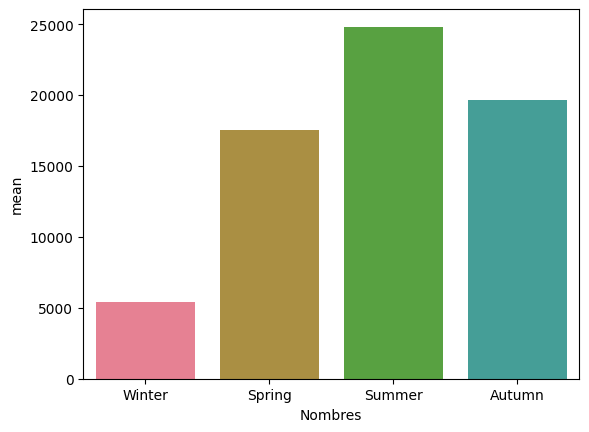

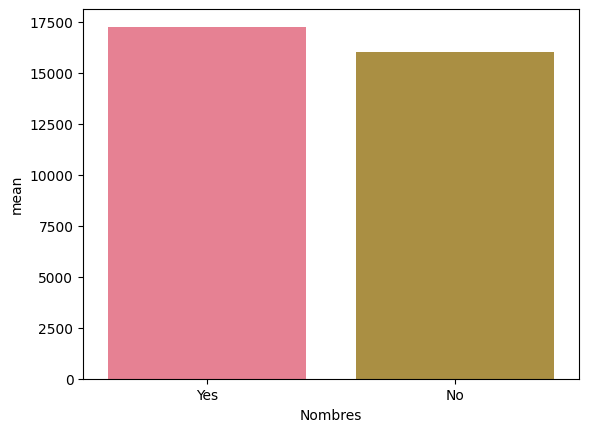

In [123]:
sns.barplot(data=data_stats.iloc[[0,1],:], x='Nombres', y='mean')
plt.show()
sns.barplot(data=data_stats.iloc[[2,3,4,5],:], x='Nombres', y='mean')
plt.show()
sns.barplot(data=data_stats.iloc[[6,7],:], x='Nombres', y='mean')
plt.show()

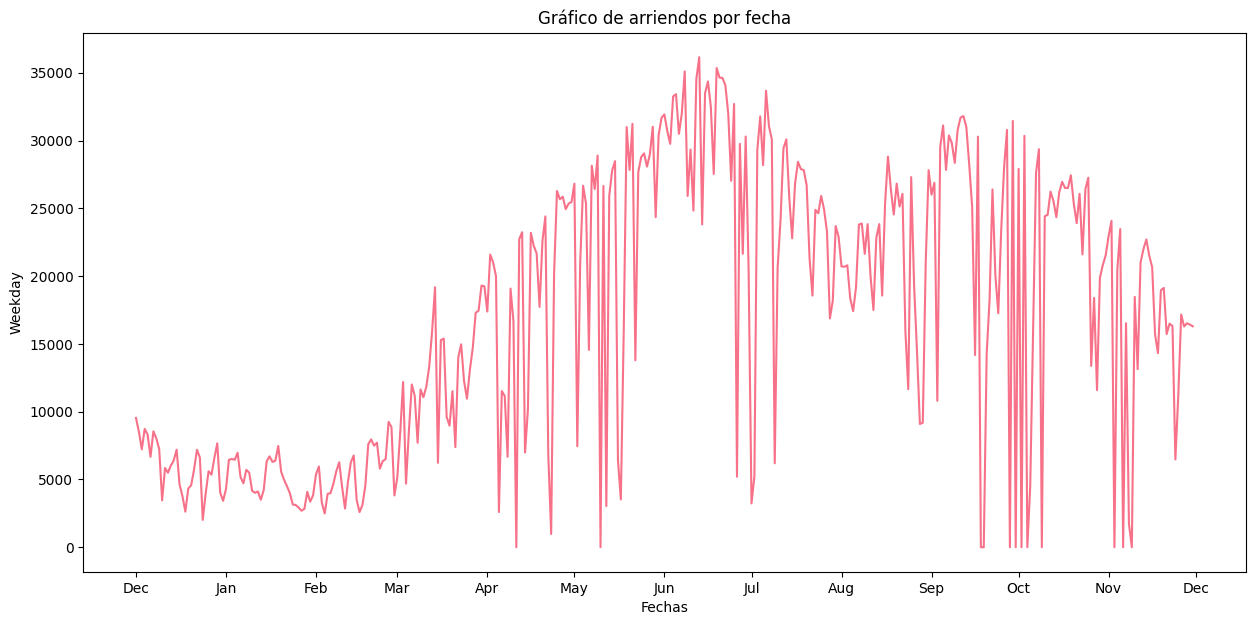

In [125]:
fig, ax=plt.subplots(1, 1, figsize=(15, 7))  
ax.xaxis.set_major_locator(md.MonthLocator())
ax.xaxis.set_major_formatter(md.DateFormatter('%b'))

plt.plot(mini_data_diario['Date'], mini_data_diario['Rented Bike Count'])
plt.xlabel('Fechas')
plt.ylabel(verify)
plt.title(f'Gráfico de arriendos por fecha')
plt.show()

b) `Respuesta`: 

c) `Respuesta`: 

d) `Respuesta`: 


> e) Grafique el promedio de bicicletas arrendadas por estación ('Seasons').

Responda las siguientes preguntas:

> f) ¿Cuáles son las estaciones en las que más se arriendan bicicletas?

> g) Transforme la fecha en variables numéricas, es decir, si _Date_ es 01/12/2017, entonces obtenga _Año_=2017, _mes_=12, _día_=1. Agreguelas al dataframe.

In [ ]:
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')

data['year'] = data['Date'].dt.year
data['month'] = data['Date'].dt.month
data['dayofweek'] = data['Date'].dt.dayofweek

data.drop('Date', axis=1, inplace=True)

"""
Su código aquí
"""

> h) Grafique y analice de forma general la correlación entre las variables **numéricas**. 

In [ ]:
data_corr= data.corr()       
plt.figure(figsize=(12,12))

sns.heatmap(data_corr, cmap='coolwarm', linewidths=0.1, annot=True, linecolor='white')

> i) Escriba sus conclusiones sobre los resultados encontrados en la correlación en la pregunta h)

### 1.1.3 Separación de conjuntos

> a) Divida el dataset en features _X_ y target _y_, además divida el dataset en un subconjunto de entrenamiento y otro de prueba.

In [ ]:
X=data.drop('Rented Bike Count',axis=1)
y=data['Rented Bike Count']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify...

> a) ¿Para qué es el parámetro stratify?

> b) Aplique Label Encoding a las variables _Seasons_ y _Holiday_ en el conjunto de entrenamiento y responda para qué sirve y como se usa.

In [ ]:
le = preprocessing.LabelEncoder()
X_train["Seasons"] = le.fit_transform(X_train["Seasons"])
X_train["Holiday"] = le.fit_transform(X_train["Holiday"])

> c) Aplique la transformación aprendida por el Label Encoder al conjunto de prueba.

In [ ]:
X_test["Seasons"] = le.transform(X_test["Seasons"])
X_test["Holiday"] = le.transform(X_test["Holiday"])

> d) ¿Por qué no se aplica la transformación del Label Encoder directamente sobre el conjunto de datos completo?

## 1.2 Modelos de Regresión

Primero entrenaremos un regresor lineal con los datos _en bruto_, ya que básicamente se transformaron las variables _Date_, _Seasons_ y _Holiday_ tal que todos los datos se puedan procesar por el regresor.

### 1.2.1 Modelo en bruto

> a) Utilice LinearRegression para entrenar el regresor y posteriormente obtener predicciones utilizando el testset.

In [ ]:
reg = LinearRegression().fit(X_train, y_train)

> b) Obtenga el error cuadrático medio de la predicción sobre los datos del conjunto *X_test*

In [ ]:
y_pred = reg.predict(X_test)
mean_squared_error(y_test, y_pred)

> c) Grafique los resultados de la predicción (y_pred) versus los target de la prueba (y_test)

In [ ]:
plt.scatter(y_test, y_pred)

plt.xlabel('Test')
plt.ylabel('Prediction')
plt.title('Test vs Prediction')

plt.show()

### 1.2.2 Modelo preprocesado

Variables cíclicas

Si aplicaramos variables _Dummy_ o transformar con _One Hot Encoder_ a la fecha terminaríamos con 12 columnas para los meses, 7 columnas para los días de la semana y 24 columnas para la hora! En lugar de eso nos aprovecharemos de que todas estas variables son cíclicas, es decir, después de 23:00 hrs viene 00:00 hrs y el ciclo se vuelve a repetir, lo mismo para los meses del año y los días de la semana. Entonces podemos pensar en este ciclo como si fuera un _circulo_ utilizando el seno y el coseno de la fecha tenemos las coordenada de la fecha en el _circulo_. De esta forma las 23:00 y las 00:00 son cercanas en esta representación. Gracias a lo anterior nos quedamos con solo 2 columnas.

$\text{var_cos} = \cos(2π\; \text{var}/\text{periodo})$

$\text{var_sin} = \sin(2π\; \text{var}/\text{periodo})$

> a) ¿Por qué no simplemente usar solo el seno o solo el coseno?

In [ ]:
X_train['month_sin'] = np.sin(2 * np.pi * X_train['month'] / 12)
X_train['month_cos'] = np.cos(2 * np.pi * X_train['month'] / 12)
X_train['hour_sin'] = np.sin(2 * np.pi * X_train['Hour'] / ?)
X_train['hour_cos'] = ...

X_test['month_sin'] = np.sin(2 * np.pi * X_test['month'] / 12)
X_test['month_cos'] = np.cos(2 * np.pi * X_test['month'] / 12)
X_test['hour_sin'] = np.sin(2 * np.pi * X_test['Hour'] / ?)
X_test['hour_cos'] = ...

X_train.drop(['month', 'Hour', 'dayofweek'], axis=1, inplace=True)
X_test.drop(['month', 'Hour', 'dayofweek'], axis=1, inplace=True)

Estación

> b) Aplique la misma lógica de variable _cíclica_ a la variable _Season_.

In [ ]:
X_train['Sin_Season'] = np.sin(2 * np.pi * X_train['Seasons'] / ?) 
X_train['Cos_Season'] = np.cos(2 * np.pi * X_train['Seasons'] / ?)
X_train.drop('Seasons', axis=1, inplace=True)

In [ ]:
X_test['Sin_Season'] = ...
X_test['Cos_Season'] = ...
X_test.drop('Seasons', axis=1, inplace=True)

Normalización de variables.

> c) Transforme las variables para que estas sigan una distribución normal con media 0 y varianza 1.



In [ ]:
X_scaler = preprocessing.StandardScaler()
y_scaler = preprocessing.StandardScaler()


cols_to_normalize = ['Temperature(°C)', 
                     'Humidity(%)', 
                     'Wind speed (m/s)', 
                     'Visibility (10m)', 
                     'Dew point temperature(°C)', 
                     'Solar Radiation (MJ/m2)',	
                     'Rainfall(mm)',	
                     'Snowfall (cm)',
                     'year']

X_train[cols_to_normalize] = X_scaler.fit_transform(X_train[cols_to_normalize])
y_train = y_scaler.fit_transform(np.array(y_train).reshape(-1, 1))

X_test[cols_to_normalize] = X_scaler.transform(X_test[cols_to_normalize])

> d) Utilice LinearRegression para entrenar el regresor y posteriormente obtener predicciones utilizando el testset.

In [ ]:
reg = LinearRegression().fit(X_train, y_train)

> e) Obtenga la predicción del regresor ya entrenado sobre el conjunto de prueba, aplicando la transformación inversa para _volver a la escala original_ de bicicletas.

In [ ]:
y_pred = reg.predict(X_test)

y_pred = y_scaler.inverse_transformy_pred

"""
Su código aquí
"""

> f) Calcule el error cuadrático medio en la escala original de bicicletas

In [ ]:
mean_squared_error(y_test, y_pred)

> g) ¿Mejoran los resultados con respecto al modelo entrenado sobre los datos en bruto?

> h) Grafique los resultados de la predicción (y_pred) versus los target de la prueba (y_test)

In [ ]:
plt.scatter(y_test, y_pred)

plt.axis('equal')

plt.xlabel('Test')
plt.ylabel('Prediction')
plt.title('Test vs Prediction')

plt.show()

### 1.2.3 Modelo SGD

En esta pregunta aplicaremos el modelo de regresión lineal utilizando el gradiente descendente estocástico (SGD), y para visualizar su rendimiento observaremos el error cuadrático medio a medida que el algoritmo SGD va iterando a través de las _epochs_. Para ello necesitamos separar una porción del conjunto de entrenamiento y así obtener el error de validación del modelo en ejemplos que no ha visto.

> a) Separe el conjunto de entrenamiento en un subconjunto de entrenamiento y uno de validación.

In [ ]:
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.25)

Utilize la librería _sklearn_ para entrenar el modelo a través _SGDRegressor_ y responda las siguientes preguntas:

> b) ¿Para qué sirve cada uno de los parametros que acepta _SGDRegressor_? Describa brevemente cada uno.

> c) Explique cuál es la función del parámetro alpha y compare, teóricamente, las variaciones de implementación del parámetro disponibles en el módulo, es decir, compare: _constant_ vs _optimal_ vs _invscaling_ vs _adaptive_.

In [ ]:
reg = SGDRegressor(loss='squared_error', 
                   penalty=None,                    
                   tol=0.001, 
                   shuffle=True,                                                          
                   warm_start=True,
                   ...)
"""
Su código aquí
"""

Entrene el regresor SGD por 100 _epochs_ como máximo, utilizando *early_stoping* con un a paciencia de 10 _epochs_. Grafique el error cuadrático medio por epoca y responda las siguientes preguntas:

> d) ¿Para qué sirve el *early_stoping*?

> e) ¿Cómo se interpretan los resultados del entrenamiento según las curvas obtenidas?

> f) ¿Cuántas _epochs_ duró su entrenamiento?

In [ ]:
y_tr = np.asarray(y_tr).ravel()
y_test = np.asarray(y_test).ravel()

tr_errors, val_errors = [], []

# train the model using early stopping
n_epochs = 100
best_val_error = float('inf')
patience = 10  # stop tring if validation error doesn't improve after 10 epochs
epoch_since_best = 0
for epoch in range(n_epochs):
    
    reg.partial_fit(X_tr, y_tr)
    
    # collect the train and validation errors after each epoch
    y_tr_pred = reg.predict(X_tr)
    y_val_pred = reg.predict(X_val)
    tr_error = mean_squared_error(y_tr, y_tr_pred)
    val_error = mean_squared_error(y_val, y_val_pred)
    tr_errors.append(tr_error)
    val_errors.append(val_error)
    
    # check if validation error has improved
    if val_error < best_val_error:
        best_val_error = val_error
        epoch_since_best = 0
    else:
        epoch_since_best += 1
        if epoch_since_best >= patience:
            print(f"Stopping training after {epoch+1} epochs")
            break    

Stopping training after 23 epochs


In [ ]:
plt.plot(tr_errors, label='train error')
plt.plot(val_errors, label='validation error')
plt.legend()
plt.show()

> g) Obtenga la predicción del regresor ya entrenado sobre el conjunto de prueba, aplicando la transformación inversa para _volver a la escala original_ de bicicletas.

In [ ]:
y_pred = reg.predict(X_test)

y_pred = y_scaler.inverse_transform(y_pred)

"""
Su código aquí
"""

> h) Calcule el error cuadrático medio en la escala original de bicicletas

In [ ]:
mean_squared_error(y_test, y_pred)

> i) ¿Mejoran los resultados con respecto al modelo anterior?

> j) Grafique los resultados de la predicción (y_pred) versus los target de la prueba (y_test)

In [ ]:
plt.scatter(y_test, y_pred)

plt.axis('equal')

plt.xlabel('Test')
plt.ylabel('Prediction')
plt.title('Test vs Prediction')

plt.show()

## 1.3 Modelo con Regularización

### 1.3.1 Regularización Ridge y Lasso

Agregue regularización Ridge al modelo SGD y entrénelo por 100 _epochs_ como máximo, utilizando early_stoping con un a paciencia de 10 _epochs_. Grafique el error cuadrático medio por _epoch_ y responda las siguientes preguntas:

> a) ¿Qué son los llamados _hiperparámetros_ de un modelo y como se relacionan con el concepto de _hyper tuning_?

> b) ¿Cuál es la motivación de agregar una penalización al modelo?

> c) ¿De qué se compone la penalización mediante regularización Ridge?

> d) ¿Cómo funciona la regularización Lasso?

> e) ¿Cuáles son las ventajas y desventajas de usar regularización Ridge versus Lasso?

> f) Utilizando GridSearchCV optimize el hiperparámetro _learning rate_ para los valores 0.1, 0.01, 0.001.

> g) Pruebe con distintos tipos de _learning rate_ 'constant', 'optimal', 'invscaling'.

> h) Optimize también los hiperparámetros de coeficiente de regularización de l2 y l1 para los valores 0.0001, 0.001, 0.01.



> **Nota:** Investigue y lea la documentación de SGDRegressor, de KFold y de GridSearchCV antes de modificar y ejecutar el código, recuerde que el código presentado en el notebook es solo una guía de referencia y no necesariamente funciona, usted puede modificar su propio código y explicar su funcionamiento.

In [ ]:
k=5
cv_folds=KFold(n_splits=k, shuffle=True)

In [ ]:
reg = SGDRegressor(loss='squared_error', 
                   penalty='l2', # regularization therm
                   alpha=0.0001, # regularization coeficient
                   max_iter=100, #epochs
                   tol=0.001, 
                   shuffle=True,                                       
                   learning_rate='invscaling', # type of lr
                   eta0=0.01,    # learning rate coeficient
                   power_t=0.25                   
                   )

In [ ]:
param_grid = {'eta0': [0.1, 0.01, 0.001], 
              'penalty': ['l2', 'l1']
              'alpha': [0.0001, 0.001, 0.01],                
              'learning_rate': ['constant', 'optimal', 'invscaling']}

hypereg = GridSearchCV(reg, 
             param_grid, 
             scoring='neg_mean_squared_error',               
             refit=True, 
             cv=cv_folds, 
             verbose=0, 
            )

In [ ]:
hypereg.fit(X_train, y_train)

> i) Obtenga los resultados para cada hiperparámetro de la grilla.

In [ ]:
pd.DataFrame(hypereg.cv_results_)

> j) Obtenga la predicción del regresor ya entrenado sobre el conjunto de prueba, aplicando la transformación inversa para _volver a la escala original_ de bicicletas.

In [ ]:
y_pred = hypereg.predict(X_test)

y_pred = y_scaler.inverse_transform(y_pred)

"""
Su código aquí
"""

> k) Calcule el error cuadrático medio en la escala original de bicicletas

In [ ]:
mean_squared_error(...)

> l) ¿Mejoran los resultados con respecto a los modelo anteriores?

> m) Grafique los resultados de la predicción (y_pred) versus los target de la prueba (y_test)

In [ ]:
plt.scatter(y_test, y_pred)

plt.axis('equal')

plt.xlabel('Test')
plt.ylabel('Prediction')
plt.title('Test vs Prediction')

plt.show()

## 1.4 Conclusiones:

(Escriba aquí sus conclusiones de la pregunta 1: Regresión lineal para la predicción de la demanda de bicicletas compartidas en Seúl)

# 2. Clasificación de hongos





La tarea de clasificación se refiere a un problema en el que se tiene un conjunto de datos y se quiere predecir la clase a la que pertenece cada elemento del conjunto de datos.

Para hacer esto, utilizaríamos un algoritmo de clasificación que examina las características de cada fruta en el conjunto de datos y aprende patrones que pueden ser utilizados para predecir su clase.

Hay muchos algoritmos de clasificación diferentes que se pueden utilizar en el aprendizaje automático, por ejemplo la regresión logística, el SVM (máquina de soporte vectorial), Random Forest y redes neuronales, etcétera.

Una vez que se entrena el modelo, se utiliza para predecir la clase de nuevos datos que no se incluyeron en el conjunto de datos original. Para medir el desempeño del modelo, se pueden utilizar diferentes métricas de evaluación, como la precisión, el recall y la F1-score.

La tarea de clasificación es muy útil en muchas áreas, como la medicina, la banca, el comercio electrónico y la publicidad, ya que permite la automatización de tareas que antes requerían una gran cantidad de tiempo y recursos humanos.

<center><img src=https://w0.peakpx.com/wallpaper/496/595/HD-wallpaper-red-mushroom-mushroom-red-beautiful.jpg></center>

Este conjunto de datos incluye descripciones de muestras correspondientes a 23 especies de hongos de la familia Agaricus y Hongo Lepiota extraídas de la Guía de campo de hongos norteamericanos de la Audubon Society. Cada especie se identifica como definitivamente comestible, definitivamente venenosa o de comestibilidad desconocida y no recomendada. Esta última clase se ha combinado con la venenosa.

## 2.1 Manipulación y exploración del conjunto de datos

In [3]:
!kaggle datasets download -d uciml/mushroom-classification

  0% 0.00/34.2k [00:00<?, ?B/s]
100% 34.2k/34.2k [00:00<00:00, 22.8MB/s]


In [4]:
!unzip mushroom-classification.zip

Archive:  mushroom-classification.zip
  inflating: mushrooms.csv           


In [28]:
df = pd.read_csv('/content/mushrooms.csv')

In [ ]:
df.head()

In [ ]:
def datainfo():
    temp_ps = pd.DataFrame(index=df.columns)
    temp_ps['DataType'] = df.dtypes
    temp_ps["Non-null_Values"] = df.count()
    temp_ps['Unique_Values'] = df.nunique()
    temp_ps['NaN_Values'] = df.isnull().sum()
    temp_ps['NaN_Values_Percentage'] = (temp_ps['NaN_Values']/len(df))*100 
    return temp_ps

datainfo()

### 2.1.1 Exploración de features

> a) ¿Por qué la variable _veil-type_ no aporta ningún valor al entrenamiento? Grafique, justifique y elimine la columna.

In [ ]:
sns.countplot(x="veil-type", data=df)

In [29]:
df.drop('veil-type', axis=1, inplace=True)

> b) Grafique la distribución de cada variable

In [ ]:
for col in df.columns:    
    sns.catplot(x=col, kind="count", data=df, height=3, aspect=1.5)

> c) Separe el conjunto de datos en los subconjuntos de entrenamiento y prueba.

> d) Codifique las variables de entrada para que puedan ser trabajadas en las siguientes preguntas.

> e) Separe los subconjuntos en _X_ e _y_

In [ ]:
# load data and split into train/test sets
train_set = df.sample(frac=0.7, random_state=42)
test_set = df.drop(train_set.index)

# create a list to store the columns to be dropped
drop_cols = []

# iterate over columns and check for binary variables
for col in train_set.columns:
    if len(train_set[col].unique()) == 2:
        # convert binary variables to 0/1
        train_set[col] = pd.factorize(train_set[col])[0]
        test_set[col] = pd.factorize(test_set[col])[0]
    else:
        # get dummies for categorical variables with more than 2 categories
        train_set = pd.concat([train_set, pd.get_dummies(train_set[col], prefix=col)], axis=1)
        test_set = pd.concat([test_set, pd.get_dummies(test_set[col], prefix=col)], axis=1)
        # add the original column to the list of columns to be dropped
        drop_cols.append(col)

# drop the original categorical columns from the train and test sets
train_set.drop(drop_cols, axis=1, inplace=True)
test_set.drop(drop_cols, axis=1, inplace=True)

# ensure that the train and test sets have the same columns
train_set, test_set = train_set.align(test_set, join='outer', axis=1, fill_value=0)

# print the shapes of the train and test sets
print('Train set shape:', train_set.shape)
print('Test set shape:', test_set.shape)


In [33]:
X_train = train_set.drop('class', axis=1)
y_train = train_set['class']
X_test = test_set.drop('class', axis=1)
y_test = test_set['class']

### 2.1.2 Principal Component Analisis

PCA (Principal Component Analysis) es una técnica de reducción de dimensionalidad comúnmente usada en machine learning para reducir el número de características en el conjunto de datos conservando la información más importante.

> a) Aplique PCA a los datos preprocesados para reducir el número de características a un conjunto más pequeño de componentes principales que capturen los patrones más importantes de los datos. Pruebe con n_components = n_features - k, donde k={1,10,50}, es decir, cree 3 posibles transformaciones de "*X_train*" y apliquelas sobre "*X_test*".

**Nota:** En adelante se le llamará "representación de los datos" a las distintas _feature selection/extraction_, por ejemplo: una posible representación de los datos es aplicar PCA con las 80 componentes principales.

In [ ]:
pca = PCA(n_components=#n_features - {1,10,50}
pca.fit(X_train)

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

"""
Su código aquí
"""

### 2.1.3 Mutual Information

La información mutua es una medida de dependencia entre variables, se puede usar para medir el grado de asociación entre las _features_ y el _target_, y usar esta información para seleccionar las _features_ más relevantes para posteriormente realizar la clasificación. Al utilizar la información mutua para seleccionar las características más informativas, puede mejorar potencialmente el rendimiento de su modelo de aprendizaje automático reduciendo la cantidad de información irrelevante o redundante en el conjunto de datos.

> a) Calcule la información mutua entre cada característica y la variable objetivo (comestible o venenoso) para medir el grado de asociación entre cada característica y la variable objetivo.

> b) Seleccione las n características con las puntuaciones de información mutua más altas como entrada para un modelo de aprendizaje automático. Pruebe con n = n_features - k, para k={1,10,50}, es decir, cree 3 posibles transformaciones de "X_train" y apliquelas sobre "X_test".





In [35]:
mi =mutual_info_classif(X_train, y_train)

In [ ]:
# set k to the number of features you want to exclude
k = 1, 10, 50

for i in k:
  # compute the number of features to select
  n = len(mi) - i

  # get the indices of the features sorted by mutual information score
  sorted_indices = np.argsort(mi)

  # select the top n features
  selected_indices = sorted_indices[-n:]

  ...
  """
  Su código aquí
  """

## 2.2 Modelos de clasificación

Primero entrenaremos el modelo Naïve Bayes con los conjuntos de datos de entrenamiento generados en el punto 2.1, luego entrenaremos otros clasificadores utilizando como conjunto de entrenamiento la mejor representación de los datos según las metricas de clasificación obtenidas con el modelo Naïve Bayes.

### 2.2.1 Naïve Bayes

Naïve Bayes es un modelo generativo clásico para la clasificación en el aprendizaje automático. En el contexto de la clasificación de hongos, puede utilizar Naïve Bayes para modelar la distribución de probabilidad de cada característica dada la etiqueta de clase (comestible o venenosa) y utilizar la regla de Bayes para calcular la probabilidad posterior de cada etiqueta de clase dadas las características observadas.

Al utilizar Naïve Bayes para la clasificación, se puede conseguir un buen rendimiento con cantidades relativamente pequeñas de datos de entrenamiento y modelos relativamente sencillos. Sin embargo, Naïve Bayes asume que las características son condicionalmente independientes dada la etiqueta de clase, lo que puede no ser cierto en la práctica. No obstante, Naïve Bayes puede ser un modelo _baseline_ útil para comparar con modelos más complejos.

Dado el conjuntos de entrenamiento con características observadas, se utiliza la regla de Bayes para calcular la probabilidad a posteriori de cada etiqueta de clase dadas las características observadas. La etiqueta de clase con la probabilidad a posteriori más alta sería la etiqueta de clase predicha para la muestra de hongos.

Si consideramos que $P(x_1, \dots, x_n)$ es constante, entonces:

\begin{align}\begin{aligned}P(y \mid x_1, \dots, x_n) \propto P(y) \prod_{i=1}^{n} P(x_i \mid y)\\\Downarrow\\\hat{y} = \arg\max_y P(y) \prod_{i=1}^{n} P(x_i \mid y).\end{aligned}\end{align}

Usted deberá utilizar la estimación Máxima A Posteriori (MAP) para estimar $P(y)$ y $P(x_i \mid y)$, donde $P(y)$ es la frecuancia relativa de la clase $y$ y $P(x_i \mid y)$ asumiremos que se distribuye de forma Gaussiana, es decir:

\begin{align}\begin{aligned}P(x_i \mid y) = \frac{1}{\sqrt{2\pi\sigma^2_y}} \exp\left(-\frac{(x_i - \mu_y)^2}{2\sigma^2_y}\right)\end{aligned}\end{align}

> a) ¿Qué otras distribuciones de probabilidad se pueden asumir para este problema considerando los valores posibles de las _features_ y del target en el conjunto de datos? Nombre mínimo 2.

Para las preguntas b) y c) considere que los datos siguen una distribución de probabilidad Gaussiana y entrene el clasificador utilizando el módulo _GaussianNB_ de la librería _sklearn_.

> b) Entrene e clasificador Naïve Bayes con los datos en _bruto_, es decir, tal cual como vienen, sin haber aplicado ninguna extracción o selección de características.

> c) Entrene e clasificador Naïve Bayes con cada una de las representaciones obtenidas en el punto 2.1.

In [ ]:
clf = GaussianNB()
clf.fit(X_train_..., y_train_...)

y_pred = clf.predict(X_test_...)

"""
Su códig aquí
"""

> d) Para cada representación de los datos del punto 2.1, obtenga las metricas de clasificación utilizando *classification_report* de la librería sklearn

In [ ]:
print(classification_report(y_test_..., y_pred, labels=['edible', 'poisonous'], ...))

> e) Determine la mejor representación de los datos según las metricas obtenidas en la pregunta anterior y utilice esa representación de aquí en adelante para entrenar a los otros clasificadores.

> f) Muestre los errores tipo 1 y tipo 2.

In [ ]:
# assume you have a classification report saved in the variable `report`
cm = confusion_matrix(y_true, y_pred)  # replace y_true and y_pred with your actual true and predicted labels

# extract the true positive, false positive, false negative, and true negative counts from the confusion matrix
tn, fp, fn, tp = cm.ravel()

# create a 2x2 matrix of the type 1 and type 2 errors
error_matrix = [[fp, fn], [tn, tp]]

# plot the heatmap using seaborn
sns.heatmap(error_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=['Type 1', 'Type 2'], yticklabels=['Type 1', 'Type 2'])


### 2.2.2 Linear Discriminant Analisis

El análisis discriminante lineal (LDA) es un algoritmo clásico de clasificación lineal, y su objetivo es encontrar una combinación lineal de características que maximice la separación entre las dos clases (setas comestibles y venenosas). En otras palabras, el LDA intenta proyectar los datos en un espacio de menor dimensión, preservando al mismo tiempo la mayor discriminación de clases posible.

La etiqueta de clase con la media más cercana en el espacio transformado sería la etiqueta de clase predicha para la muestra de setas.

> a) ¿Qué es lo que asume el modelo LDA sobre la distribución condicional de las clases?

> b) ¿Qué es lo que asume el modelo LDA sobre las matrices de covarianza de la distribución condicional?

> c) Entrene este clasificador con el mejor dataset del punto 2.1 según los resultados obtenidos con el clasificador Naïve Bayes en el punto 2.2.1. Entrene el LDA con n_components = n_features - k, donde k={1,10,50}, es decir, entrene 3 modelos distintos.

In [ ]:
clf = LinearDiscriminantAnalysis(n_components=)
clf.fit(X_train_..., y_train_...)

y_pred = clf.predict(X_test_...)

"""
Su códig aquí
"""

> d) Obtenga las metricas de clasificación utilizando *classification_report* de la librería sklearn

In [ ]:
print(classification_report(y_test_..., y_pred, labels=['edible', 'poisonous'], ...))

> e) Muestre los errores tipo 1 y tipo 2.

In [ ]:
# assume you have a classification report saved in the variable `report`
cm = confusion_matrix(y_true, y_pred)  # replace y_true and y_pred with your actual true and predicted labels

# extract the true positive, false positive, false negative, and true negative counts from the confusion matrix
tn, fp, fn, tp = cm.ravel()

# create a 2x2 matrix of the type 1 and type 2 errors
error_matrix = [[fp, fn], [tn, tp]]

# plot the heatmap using seaborn
sns.heatmap(error_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=['Type 1', 'Type 2'], yticklabels=['Type 1', 'Type 2'])


### 2.2.3 Regresión logística

La regresión logística es un modelo discriminativo de clasificación clásico que puede utilizarse para la clasificación de hongos. El objetivo de la regresión logística es encontrar el modelo lineal que mejor se ajuste y que pueda predecir la probabilidad de que cada muestra de hongo pertenezca a una clase determinada (comestible o venenosa).

> a) ¿En qué consiste la estimación de máxima verosimilitud de coeficientes?

> b) ¿Qué asume este modelo de la relación entre las características y la variable objetivo?

> c) ¿Qué se hace para evitar el sobreajuste de este modelo?

> d) Entrene este clasificador con el mejor dataset del punto 2.1 según los resultados obtenidos con el clasificador Naïve Bayes en el punto 2.2.1.

**Nota:** Usted puede variar o probar con distintos hiperparámetros siempre y cuando se utilizen de forma correcta el modelo y los datos para que pueda obtener predicciones comparables con los otros modelos. Puede basarse en los hiperparámetros probados con el regresor logistico y en la documentación de la librería.

In [ ]:
clf = LogisticRegression(...)
clf.fit(X_train_..., y_train_...)

y_pred = clf.predict(X_test_...)

"""
Su códig aquí
"""

> e) Obtenga las metricas de clasificación utilizando *classification_report* de la librería sklearn

In [ ]:
print(classification_report(y_test_..., y_pred, labels=['edible', 'poisonous'], ...))

> f) Muestre los errores tipo 1 y tipo 2.

In [ ]:
# assume you have a classification report saved in the variable `report`
cm = confusion_matrix(y_true, y_pred)  # replace y_true and y_pred with your actual true and predicted labels

# extract the true positive, false positive, false negative, and true negative counts from the confusion matrix
tn, fp, fn, tp = cm.ravel()

# create a 2x2 matrix of the type 1 and type 2 errors
error_matrix = [[fp, fn], [tn, tp]]

# plot the heatmap using seaborn
sns.heatmap(error_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=['Type 1', 'Type 2'], yticklabels=['Type 1', 'Type 2'])


### 2.2.4 Support Vector Machines

Las máquinas de vectores soporte (SVM) son un algoritmo de aprendizaje automático potente y versátil que puede utilizarse para la clasificación de hongos. La idea principal detrás de SVM es encontrar el hiperplano que mejor separa las diferentes clases en el conjunto de datos.

Utilice los datos de entrenamiento para ajustar un modelo SVM a los datos. Esto implica encontrar el hiperplano que maximice el margen entre las muestras positivas y negativas. El margen es la distancia entre el hiperplano y las muestras más cercanas de cada clase.

Si los datos no se pueden separar linealmente, utilice funciones de kernel para transformar los datos en un espacio de mayor dimensión en el que se puedan separar. Las funciones kernel más comunes incluyen funciones polinómicas, de base radial (RBF) y sigmoidales.

Entrene un clasificador SVM con el mejor dataset del punto 2.1 según los resultados obtenidos con el clasificador Naïve Bayes en el punto 2.2.1.

Entrene el clasificador con los siguientes tipos de _kernel_, con parámetro de regularización _l2_ y coeficiente fijo 1.0:

> a) Lineal, con 2 valores del coeficiente gamma distintos.

> b) Polinómico, con 2 valores del coeficiente gamma distintos.

> c) rbf, con 2 valores del coeficiente gamma distintos.

In [ ]:
clf = NuSVC(kernel={'linear', 'poly', 'rbf'}, gamma=...)
clf.fit(X_train_..., y_train_...)

y_pred = clf.predict(X_test_...)

"""
Su códig aquí
"""

> d) Obtenga las metricas de clasificación utilizando *classification_report* de la librería sklearn

In [ ]:
print(classification_report(y_test_..., y_pred, labels=['edible', 'poisonous'], ...))

> e) Muestre los errores tipo 1 y tipo 2.

In [ ]:
# assume you have a classification report saved in the variable `report`
cm = confusion_matrix(y_true, y_pred)  # replace y_true and y_pred with your actual true and predicted labels

# extract the true positive, false positive, false negative, and true negative counts from the confusion matrix
tn, fp, fn, tp = cm.ravel()

# create a 2x2 matrix of the type 1 and type 2 errors
error_matrix = [[fp, fn], [tn, tp]]

# plot the heatmap using seaborn
sns.heatmap(error_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=['Type 1', 'Type 2'], yticklabels=['Type 1', 'Type 2'])


## 2.3 Conclusiones:

(Escriba aquí sus conclusiones de la pregunta 2: Clasificación de hongos)